# predict west nile virus
- https://www.kaggle.com/c/predict-west-nile-virus

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,10)

In [3]:
y2008_start = pd.datetime(2008,1,1)
y2008_stop = pd.datetime(2008,12,31)
y2010_start = pd.datetime(2010,1,1)
y2010_stop = pd.datetime(2010,12,31)
y2012_start = pd.datetime(2012,1,1)
y2012_stop = pd.datetime(2012,12,31)
y2014_start = pd.datetime(2014,1,1)

In [10]:
test = pd.read_csv('test.csv')
test.set_index('Id', inplace=True)
test.Date = pd.to_datetime(test.Date)
test[:5]

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
Id,,,,,,,,,,
1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


In [2]:
sol = pd.read_csv('west_nile_v55_04.csv')
sol[:4]

,Id,WnvPresent
0,1,0.000008
1,2,0.000002
2,3,0.000006
3,4,0.000000


In [7]:
sol.set_index('Id', inplace=True)
sol[:2]

,WnvPresent
Id,
1,0.000008
2,0.000002


In [34]:
sol2 = sol.copy()
for i in test.index:
    if test.Date[i] > y2012_start and test.Date[i] < y2012_stop:
        sol2.WnvPresent[i]  = sol2.WnvPresent[i] + (sol2.WnvPresent[i] * 0.05)
sol2[:5]

,WnvPresent
Id,
1,7.803044e-06
2,1.683694e-06
3,5.999032e-06
4,2.151363e-07
5,9.970123e-09


In [35]:
sol2.to_csv('wnv_up2012.csv')

In [36]:
sol3 = sol.copy()
for i in test.index:
    if test.Date[i] > y2012_start and test.Date[i] < y2012_stop:
        val = sol3.WnvPresent[i] + (sol3.WnvPresent[i] * 0.1)
        if val < 1.0:
            sol3.WnvPresent[i]  = val
        else:
            sol3.WnvPresent[i]  = 0.99

In [38]:
sol3.to_csv('wnv_up10_2012.csv')

In [40]:
sol4 = sol.copy()
for i in test.index:
    if test.Date[i] > y2012_start and test.Date[i] < y2012_stop:
        val = sol4.WnvPresent[i] + (sol4.WnvPresent[i] * 0.2)
        if val < 1.0:
            sol4.WnvPresent[i]  = val
        else:
            sol4.WnvPresent[i]  = 0.99
sol3.to_csv('wnv_up20_2012.csv')

In [41]:
sol5 = sol.copy()
for i in test.index:
    if test.Date[i] > y2012_start and test.Date[i] < y2012_stop:
        val = sol5.WnvPresent[i] + (sol5.WnvPresent[i] * 2.0)
        if val < 1.0:
            sol5.WnvPresent[i]  = val
        else:
            sol5.WnvPresent[i]  = 0.99
sol3.to_csv('wnv_up2_2012.csv')

In [45]:
sol_2 = pd.read_csv('west_nile_v55044_2.csv')
sol_2.set_index('Id', inplace=True)
sol_2[:5]

,WnvPresent
Id,
1,0.000129
2,0.000038
3,0.000095
4,0.000006
5,0.000000


In [46]:
sol_2_2 = sol_2.copy()
sol = sol_2_2
for i in test.index:
    if test.Date[i] > y2012_start and test.Date[i] < y2012_stop:
        val = sol.WnvPresent[i] + (sol.WnvPresent[i] * 0.1)
        if val < 1.0:
            sol.WnvPresent[i]  = val
        else:
            sol.WnvPresent[i]  = 0.99
sol.to_csv('wnv_v2_up10_2012.csv')

In [12]:
lasagne_enhanced = pd.read_csv('enhanced_final_opt.csv')
lasagne_enhanced.set_index('Id', inplace=True)
sol = lasagne_enhanced
for i in test.index:
    if test.Date[i] > y2012_start and test.Date[i] < y2012_stop:
        val = sol.WnvPresent[i] * 1.75
        if val < 1.0:
            sol.WnvPresent[i]  = val
        else:
            sol.WnvPresent[i]  = 0.999
sol.to_csv('enhanced_up75_2012.csv')

In [17]:
lasagne_enhanced = pd.read_csv('enhanced_final_opt.csv')
lasagne_enhanced.set_index('Id', inplace=True)
sol = lasagne_enhanced
for i in test.index:
    if test.Date[i] > y2012_start and test.Date[i] < y2012_stop:
        val = sol.WnvPresent[i] * 1.75
    elif test.Date[i] >= y2014_start:
        val = sol.WnvPresent[i] * 0.9
    if val < 1.0:
        sol.WnvPresent[i]  = val
    else:
        sol.WnvPresent[i]  = 0.999

sol.to_csv('enhanced_dn10_2014.csv')

In [18]:
wnv6 = pd.read_csv('west_nile_v6.csv')
wnv6.set_index('Id', inplace=True)
sol = wnv6
for i in test.index:
    if test.Date[i] > y2012_start and test.Date[i] < y2012_stop:
        val = sol.WnvPresent[i] * 1.75
        if val < 1.0:
            sol.WnvPresent[i]  = val
        else:
            sol.WnvPresent[i]  = 0.999
sol.to_csv('LNN_spray_up75_2012.csv')

In [20]:
up2010 = pd.read_csv('enhanced_up75_2012.csv')
up2010.set_index('Id', inplace=True)
sol = up2010
for i in test.index:
    if test.Date[i] > y2010_start and test.Date[i] < y2010_stop:
        val = sol.WnvPresent[i] * 1.01
        if val < 1.0:
            sol.WnvPresent[i]  = val
        else:
            sol.WnvPresent[i]  = 0.999
sol.to_csv('LNN_up01_2010.csv')

In [22]:
up2010 = pd.read_csv('enhanced_up75_2012.csv')
up2010.set_index('Id', inplace=True)
sol = up2010
for i in test.index:
    if test.Date[i] > y2010_start and test.Date[i] < y2010_stop:
        val = sol.WnvPresent[i] * 0.90
        if val < 1.0:
            sol.WnvPresent[i]  = val
        else:
            sol.WnvPresent[i]  = 0.99999
sol.to_csv('LNN_dn10_2010.csv')

In [13]:
dn2010 = pd.read_csv('enhanced_up75_2012.csv')
dn2010.set_index('Id', inplace=True)
sol = dn2010
for i in test.index:
    if test.Date[i] > y2010_start and test.Date[i] < y2010_stop:
        val = sol.WnvPresent[i] * 0.75
        if val < 1.0:
            sol.WnvPresent[i]  = val
        else:
            sol.WnvPresent[i]  = 0.99999
sol.to_csv('LNN_dn75_2010.csv')
LNN_dn75_2010 = sol

In [7]:
dn2010 = pd.read_csv('enhanced_up75_2012.csv')
dn2010.set_index('Id', inplace=True)
sol = dn2010
for i in test.index:
    if test.Date[i] > y2010_start and test.Date[i] < y2010_stop:
        val = sol.WnvPresent[i] * 0.25
        if val < 1.0:
            sol.WnvPresent[i]  = val
        else:
            sol.WnvPresent[i]  = 0.99999
sol.to_csv('LNN_dn25_2010.csv')

In [8]:
dn2010 = pd.read_csv('enhanced_up75_2012.csv')
dn2010.set_index('Id', inplace=True)
sol = dn2010
for i in test.index:
    if test.Date[i] > y2010_start and test.Date[i] < y2010_stop:
        val = sol.WnvPresent[i] * 0.50
        if val < 1.0:
            sol.WnvPresent[i]  = val
        else:
            sol.WnvPresent[i]  = 0.99999
sol.to_csv('LNN_dn50_2010.csv')

In [10]:
dn2008 = pd.read_csv('LNN_dn75_2010.csv')
dn2008.set_index('Id', inplace=True)
sol = dn2008
for i in test.index:
    if test.Date[i] > y2008_start and test.Date[i] < y2008_stop:
        val = sol.WnvPresent[i] * 0.75
        if val < 1.0:
            sol.WnvPresent[i]  = val
        else:
            sol.WnvPresent[i]  = 0.99999
sol.to_csv('LNN_dn75_2008.csv')

In [6]:
dn2008 = pd.read_csv('LNN_dn75_2010.csv')
dn2008.set_index('Id', inplace=True)
sol = dn2008
for i in test.index:
    if test.Date[i] > y2008_start and test.Date[i] < y2008_stop:
        val = sol.WnvPresent[i] * 0.90
        if val < 1.0:
            sol.WnvPresent[i]  = val
        else:
            sol.WnvPresent[i]  = 0.99999
sol.to_csv('LNN_dn10_2008.csv')

In [7]:
dn2008 = pd.read_csv('LNN_dn75_2010.csv')
dn2008.set_index('Id', inplace=True)
sol = dn2008
for i in test.index:
    if test.Date[i] > y2008_start and test.Date[i] < y2008_stop:
        val = sol.WnvPresent[i] * 1.1
        if val < 1.0:
            sol.WnvPresent[i]  = val
        else:
            sol.WnvPresent[i]  = 0.99999
sol.to_csv('LNN_up10_2008.csv')

In [8]:
LNN = pd.read_csv('submission_final_opt_v5.csv')
LNN.set_index('Id', inplace=True)
sol = LNN
for i in test.index:
    val = sol.WnvPresent[i] 
    if test.Date[i] > y2010_start and test.Date[i] < y2010_stop:
        val = val * 0.75
    elif test.Date[i] > y2012_start and test.Date[i] < y2012_stop:
        val = val * 1.75
        
    if val > 0.9999999:
        sol.WnvPresent[i]  = 0.99999
        
sol.to_csv('LNN_final_v5.csv')
LNN_mod = sol

In [12]:
LNN_mod = sol

In [9]:
import matplotlib.pyplot as plt
%pylab inline
plt.rcParams['figure.figsize'] = (10,10)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [31]:
def plot_compare(x, xlabel, y, ylabel):
    x = np.array(x)
    y = np.array(y)
    m, b = np.polyfit(x, y, 1)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1) # one row, one column, first plot
    ax.scatter(x, y, s=1)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title("Comparing")
    plt.plot(x, m*x + b, '-')
    print(m)
    plt.show()
    return ax, m, b

1.20489423847


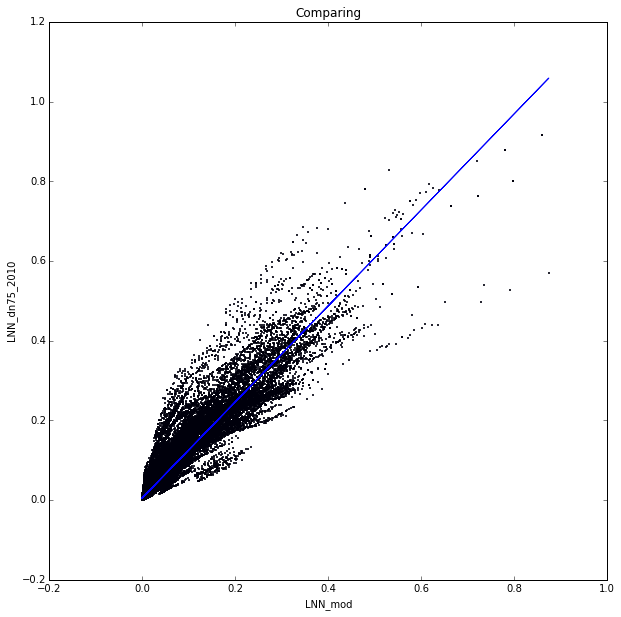

In [38]:
ax, m, b = plot_compare(LNN_mod.WnvPresent, "LNN_mod", LNN_dn75_2010.WnvPresent, "LNN_dn75_2010")

In [39]:
m

1.2048942384704204

In [51]:
LNN_mod_2 = LNN_mod * m
for i in LNN_mod_2.index:
    if LNN_mod_2.WnvPresent[i] > 0.99999:
        LNN_mod_2.WnvPresent[i] = 0.99999

1.0


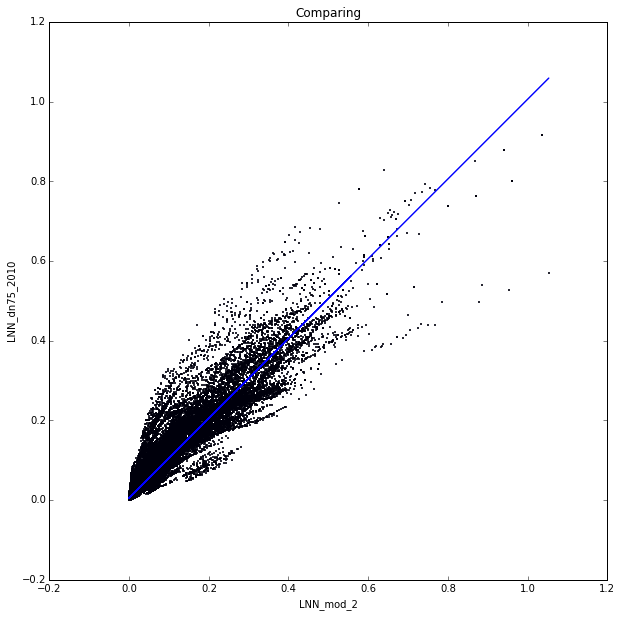

(<matplotlib.axes._subplots.AxesSubplot at 0x113280150>,
 0.99999999999999989,
 0.0058669761795514192)

In [41]:
plot_compare(LNN_mod_2.WnvPresent, "LNN_mod_2", LNN_dn75_2010.WnvPresent, "LNN_dn75_2010")

In [52]:
LNN_mod_2.to_csv('LNN_final_v6.csv')

In [50]:
for i in LNN_mod_2.index:
    if LNN_mod_2.WnvPresent[i] > 0.99999:
        print LNN_mod_2.WnvPresent[i] 

1.03593860054
1.03593860054
1.05319098249
